# 02 -- The scikit-learn API

In [1]:
%load_ext watermark

In [2]:
%watermark -a "Sebastian Raschka" -p numpy,scikit-learn,mlxtend

Author: Sebastian Raschka

numpy       : 1.25.0
scikit-learn: 1.3.0
mlxtend     : 0.22.0



### Quick example

In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

X, y = load_iris(return_X_y=True)
est = KNeighborsClassifier()

est.fit(X, y)

KNeighborsClassifier()

In [4]:
est.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
est.score(X, y)

0.9666666666666667

### Step by step

In [6]:
est = KNeighborsClassifier(n_neighbors=5)

In [7]:
est.n_neighbors

5

In [8]:
est.fit(X, y)

KNeighborsClassifier()

In [9]:
est.classes_

array([0, 1, 2])

In [10]:
import numpy as np

class KNNClassifier(object):
    def __init__(self, n_neighbors, dist_fn=None):
        self.n_neighbors = n_neighbors
        if dist_fn is None:
            self.dist_fn = self._euclidean_dist
    
    def fit(self, X, y):
        self.dataset_ = X.copy()
        self.labels_ = y.copy()
        self.possible_labels_ = np.unique(y)

    def predict(self, X):
        predictions = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            k_nearest = self._find_nearest(X[i])[:self.n_neighbors]
            indices = [entry[1] for entry in k_nearest]
            k_labels = self.labels_[indices]
            counts = np.bincount(k_labels,
                                 minlength=self.possible_labels_.shape[0])
            pred_label = np.argmax(counts)
            predictions[i] = pred_label
        return predictions

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def _euclidean_dist(self, a, b):
        dist = 0.
        for ele_i, ele_j in zip(a, b):
            dist += ((ele_i - ele_j)**2)
        dist = dist**0.5
        return dist
        
    def _find_nearest(self, x):
        dist_idx_pairs = []
        for j in range(self.dataset_.shape[0]):
            d = self.dist_fn(x, self.dataset_[j])
            dist_idx_pairs.append((d, j))
            
        sorted_dist_idx_pairs = sorted(dist_idx_pairs)

        return sorted_dist_idx_pairs

In [11]:
clf = KNNClassifier(n_neighbors=5)
clf.fit(X, y)

In [12]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
clf.score(X, y)

0.9666666666666667

### 2D Decision region example

In [14]:
#pip install mlxtend

In [15]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

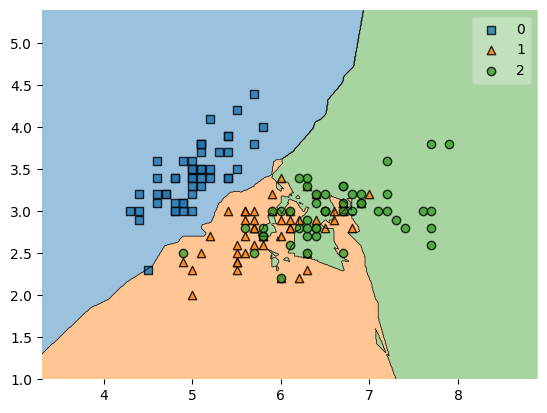

In [18]:
est = KNeighborsClassifier(n_neighbors=5)
est.fit(X[:, :2], y) # only use 2 features

plot_decision_regions(X[:, :2], y, est)